#### Contributor : Khaled EHab

In [2]:
# Import regular expression
import re

In [1]:
# Imports Cell - Keep on adding the imports based on the need
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Winsorize is to normalize (reduce the impact of) outliers
from scipy.stats.mstats import winsorize

In [4]:
# Standardization of numerical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
# RandomOverSampler for over sampling - When there is imbalance in the data.
# imbalance in data means - data categorization is not in proper proportion
from imblearn.over_sampling import RandomOverSampler

In [6]:
# Creating the train test split using the metrics
from sklearn.model_selection import train_test_split

In [7]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [8]:
# Importing Support vector Classifier
from sklearn.svm import SVC

In [9]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Import Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [13]:
# Import XGBClassifier
from xgboost import XGBClassifier

In [14]:
# Importing Plot_Confusion_Matrix and 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import *

In [15]:
#Importing TSNE - t-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE

In [16]:
# Import kmeans cluster model
from scipy.cluster.vq import kmeans,vq

In [17]:
import seaborn as sns

In [18]:
from sklearn.decomposition import PCA

#### Merge train and test to apply feature engineering
* As test doesn't have a target column

In [20]:
df= pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [21]:
df_pred = pd.DataFrame() #Predictions are to be made on Test data - So an empty dataframe is created

In [22]:
df_both = pd.concat([df,df_test],ignore_index=True) #Combining both test and train datasets for feature engineering

In [23]:
df_both=pd.concat([df,df_test],ignore_index=True)

In [24]:
df.head(1)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.shape, df_test.shape, df_both.shape # we observe the Class column in Train data and both data

((1763, 1559), (756, 1558), (2519, 1559))

In [26]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 30.0 MB


#### Outliers Resample

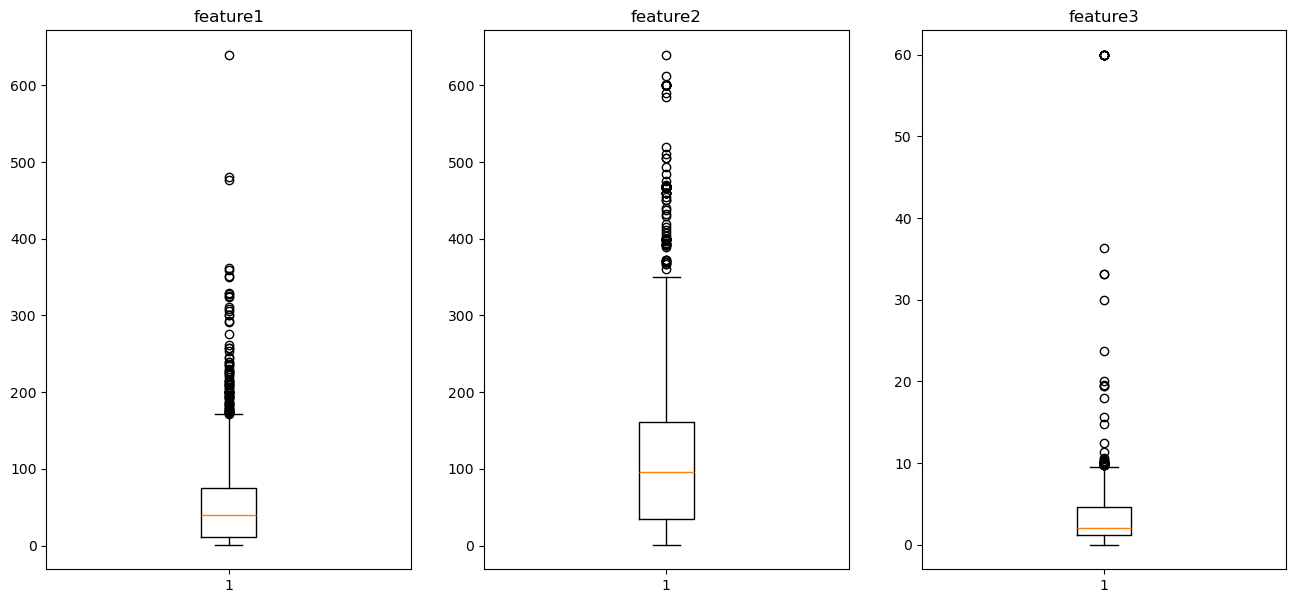

In [27]:
fig, axs = plt.subplots(1,3,figsize=(16,7))
for i in range(3):
    axs[i].set_title(f'feature{i+1}')
    axs[i].boxplot(df_both[f'feature_{i+1}'])

##### We can see the outliers in all the first three features(columns)

#### If any dataset has outliers - we must winsorize them to lower their impact

In [28]:
for col in df_both.columns[0:3]:
    l = 0.1 if col=='feature_2' else 0.05
    df_both[col]=winsorize(df_both[col],limits=l) #Winsorize is to reduce the impact of outliers

In [29]:
df_both

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2515,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2516,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2517,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


#### To make sure the outliers are normalized - again plot the boxplots and check the outliers

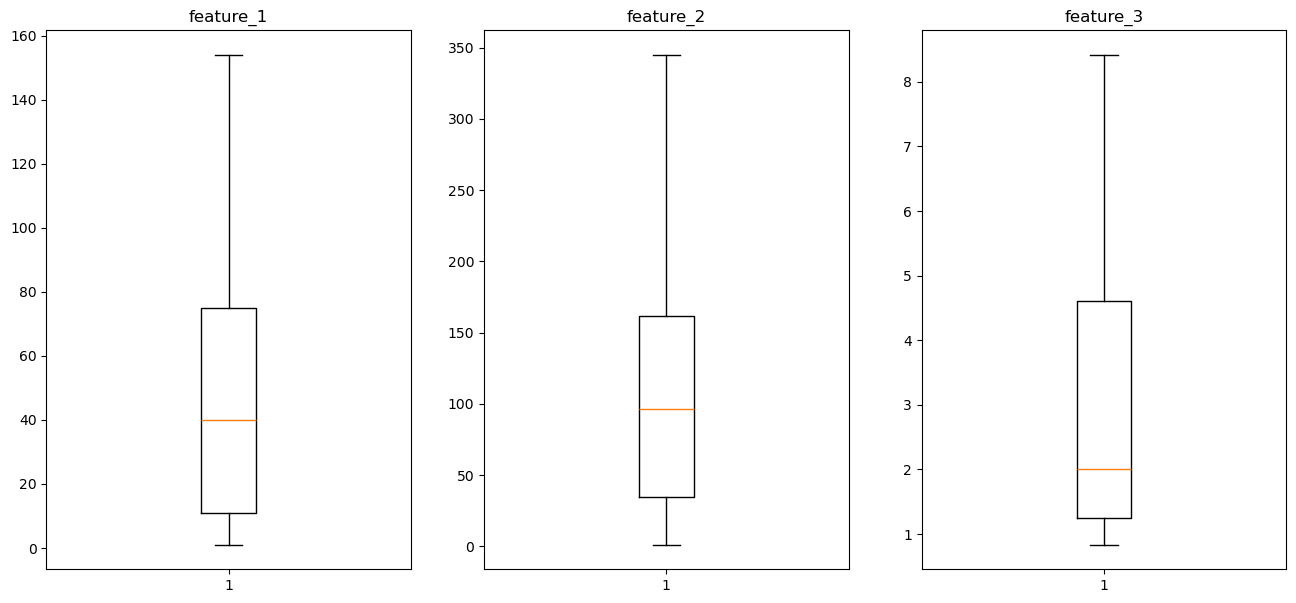

In [30]:
fig, axs = plt.subplots(1,3,figsize=(16,7))
for i in range(3):
    axs[i].set_title(f'feature_{i+1}')
    axs[i].boxplot(df_both[f'feature_{i+1}'])

##### Now we can see that Outliers are kind of normalized (reduced to maximum limits)

#### From the observation of first 3 columns (numerical values) - they are at different scales (different range of values)
#### Hence it is important to normalize all the numerical columns

## Standard scale first 3 features

In [31]:
df2 = pd.DataFrame(StandardScaler().fit_transform(df_both.iloc[:,:3]),columns=df_both.columns[:3])

In [32]:
df2.head()

,feature_1,feature_2,feature_3
0,1.073694,0.419477,-0.622123
1,-0.656580,-0.326405,0.388123
2,1.052066,0.322609,-0.655758
3,-0.224012,-0.742936,-0.859827
4,-0.829608,1.136298,2.078441


In [33]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_both = pd.concat([df2,df_both.iloc[:,3:]],axis=1) 
#Adding the updated numerical feature columns With non updated binary features columns and recreating the df_both DataFrame for all rows

#### As the Winsorization and standardization are completed - seperate Train and Test datasets

In [35]:
df_both.shape

(2519, 1559)

In [36]:
df = df_both[:df.shape[0]]

In [37]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,1.073694,0.419477,-0.622123,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,-0.656580,-0.326405,0.388123,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,1.052066,0.322609,-0.655758,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,-0.224012,-0.742936,-0.859827,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,-0.829608,1.136298,2.078441,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-1.067521,-1.120720,-0.463653,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1759,-0.224012,0.806948,0.724871,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1760,0.987180,0.981310,-0.356369,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1761,-0.743094,-0.345778,0.749632,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [38]:
df_test=df_both[df.shape[0]+1:].iloc[:,:-1].reset_index(drop=True)
# Till now df_test indexes are from 1763 to 2519. When df_test is seperated, the index should start from Zero again.
# last column in df_both related to Class needs to be excluded from the df_test, hence iloc & -1 are used to exclude that column

In [39]:
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,1.246721,0.603526,-0.599382,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.067521,-1.120720,-0.463653,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.208557,2.211530,1.834160,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.208557,0.032006,-0.463653,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.614405,0.080440,-0.859827,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,-1.067521,-1.120720,-0.463653,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,-1.067521,-1.120720,-0.463653,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,-0.829608,-0.152043,2.078441,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,-0.418668,-0.277971,-0.131381,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.Class.value_counts()

Class
0.0    1620
1.0     143
Name: count, dtype: int64

#### It's observed that number of rows with 1's are way less than Zero. Hence the Data is Imbalanced

### Over-sampling

In [41]:
def over_sample_train_test(x,y):
    ros=RandomOverSampler(random_state=0)
    ros.fit(x,y)
    x_res,y_res=ros.fit_resample(x,y)
    x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=1)
    return x_train,x_test,y_train,y_test

In [42]:
x=df.drop('Class',axis=1)

In [43]:
y=df.Class

In [44]:
x_train,x_test,y_train,y_test = over_sample_train_test(x,y)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2592, 1558), (648, 1558), (2592,), (648,))

## Apply Models

### Logistic Regression

In [46]:
lr=LogisticRegression(solver='liblinear')
svm=SVC(probability=True)
dt=DecisionTreeClassifier(max_depth=10,max_features=8,random_state=100)
rf=RandomForestClassifier(max_depth=4, max_features=3)
knn=KNeighborsClassifier(n_neighbors=94)
gnb=GaussianNB()
xgb=XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='mlogloss')

In [47]:
def apply_model(model,x_train,x_test,y_train,y_test):
    print(' '*20+re.search(r'(.*)\(',f'''{model}''',re.M).group(1))
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('')
    print('Train Score:   ',model.score(x_train,y_train))
    print('Test Score:    ',model.score(x_test,y_test))
    print('')
    plot_confusion_matrix(model,x_test,y_test)
    print(Classification_report(y_test,y_pred))

In [48]:
d={}
def predict_test(model):
    col=re.search(r'(.*)\(',f'''{model}''',re.M).group(1)
    if col not in d:
        d[col]=1
    else:
        d[col]+=1
    col+=f'{d[col]}'
    df_pred[col]=model.predict(df_test)
    df_pred

#### Applying Logistic Regression on the train and test data

In [49]:
def apply_model(model,x_train,x_test,y_train,y_test):
    print(' '*20+re.search(r'(.*)\(',f'''{model}''',re.M).group(1))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('')
    print('Train Score:  ',model.score(x_train,y_train))
    print('Test Score:   ',model.score(x_test,y_test))
    print('')
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    print(classification_report(y_test,y_pred))

d={}
def predict_test(model):
    col=re.search(r'(.*)\(',f'''{model}''',re.M).group(1)
    if col not in d:
        d[col]=1
    else:
        d[col]+=1
    col+=f'{d[col]}'
    df_pred[col]=model.predict(df_test)
    df_pred

                    LogisticRegression

Train Score:   0.9564043209876543
Test Score:    0.9367283950617284

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       328
         1.0       0.93      0.95      0.94       320

    accuracy                           0.94       648
   macro avg       0.94      0.94      0.94       648
weighted avg       0.94      0.94      0.94       648



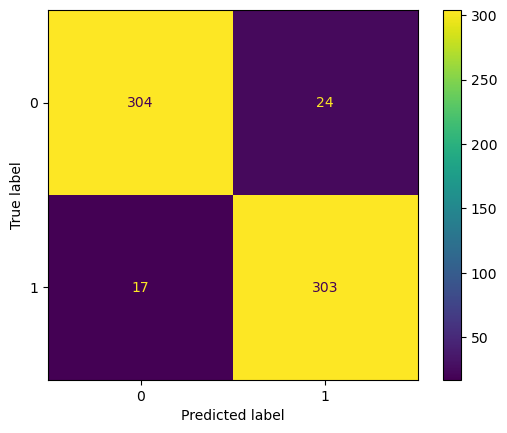

In [50]:
apply_model(lr,x_train,x_test,y_train,y_test)
predict_test(lr)

#### Applying Support Vector Classifier on the train and test data

                    SVC

Train Score:   0.9567901234567902
Test Score:    0.9290123456790124

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       328
         1.0       0.92      0.94      0.93       320

    accuracy                           0.93       648
   macro avg       0.93      0.93      0.93       648
weighted avg       0.93      0.93      0.93       648



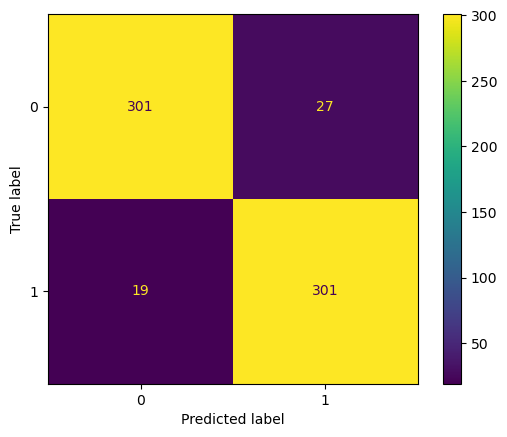

In [51]:
apply_model(svm,x_train,x_test,y_train,y_test)
predict_test(svm)

#### Applying K-nearest neighbor on the train and test data

                    KNeighborsClassifier

Train Score:   0.8020833333333334
Test Score:    0.8148148148148148

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       328
         1.0       0.90      0.71      0.79       320

    accuracy                           0.81       648
   macro avg       0.83      0.81      0.81       648
weighted avg       0.83      0.81      0.81       648



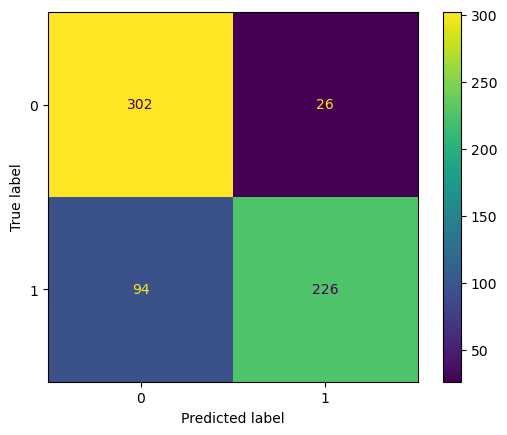

In [52]:
apply_model(knn,x_train,x_test,y_train,y_test)
predict_test(knn)

#### Applying Gaussian Naive Bayes on the train and test data

                    GaussianNB

Train Score:   0.8935185185185185
Test Score:    0.8950617283950617

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88       328
         1.0       0.82      1.00      0.90       320

    accuracy                           0.90       648
   macro avg       0.91      0.90      0.89       648
weighted avg       0.91      0.90      0.89       648



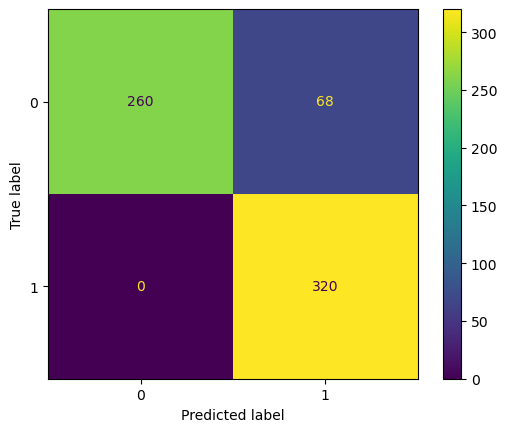

In [53]:
apply_model(gnb,x_train,x_test,y_train,y_test)
predict_test(gnb)

#### Applying DecisionTreeClassifier on the train and test data

                    DecisionTreeClassifier

Train Score:   0.7735339506172839
Test Score:    0.7592592592592593

              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80       328
         1.0       0.90      0.58      0.70       320

    accuracy                           0.76       648
   macro avg       0.80      0.76      0.75       648
weighted avg       0.80      0.76      0.75       648



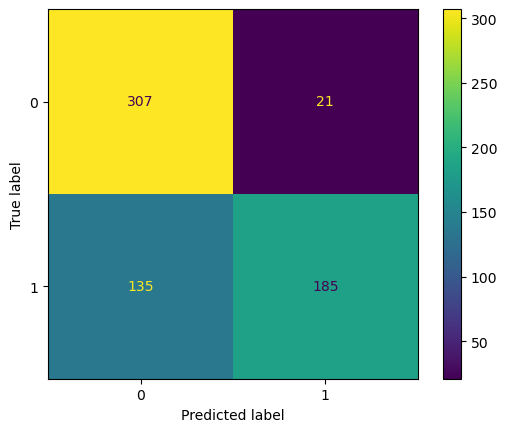

In [54]:
apply_model(dt,x_train,x_test,y_train,y_test)
predict_test(dt)

#### Applying RandomForestClassifier on the train and test data

                    RandomForestClassifier

Train Score:   0.8294753086419753
Test Score:    0.8240740740740741

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84       328
         1.0       0.92      0.71      0.80       320

    accuracy                           0.82       648
   macro avg       0.84      0.82      0.82       648
weighted avg       0.84      0.82      0.82       648



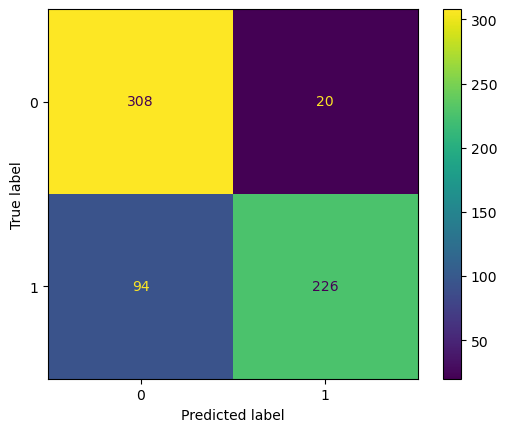

In [55]:
apply_model(rf,x_train,x_test,y_train,y_test)
predict_test(rf)

#### Applying XGBClassifier on the train and test data

                    XGBClassifier


c:\Users\sudhe\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Train Score:   0.9857253086419753
Test Score:    0.9583333333333334

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       328
         1.0       0.92      1.00      0.96       320

    accuracy                           0.96       648
   macro avg       0.96      0.96      0.96       648
weighted avg       0.96      0.96      0.96       648



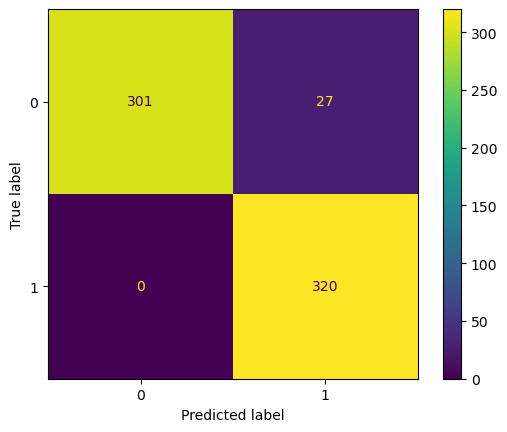

In [56]:
apply_model(xgb,x_train,x_test,y_train,y_test)
predict_test(xgb)

In [57]:
df_pred

,LogisticRegression1,SVC1,KNeighborsClassifier1,GaussianNB1,DecisionTreeClassifier1,RandomForestClassifier1,XGBClassifier1
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
750,0.0,0.0,0.0,0.0,0.0,0.0,0
751,0.0,0.0,0.0,0.0,0.0,0.0,0
752,0.0,0.0,0.0,0.0,0.0,0.0,0
753,0.0,0.0,0.0,0.0,0.0,0.0,0


In [58]:
ts =  TSNE(learning_rate=50)
features=ts.fit_transform(df_both.drop('Class',axis=1))
tsne_x,tsne_y='tsne_x','tsne_y'
df_both[tsne_x] = features[:,0]
df_both[tsne_y] = features[:,1]
df_both
## We are adding two new columns containing hte TSNE values for existing features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class,tsne_x,tsne_y
0,1.073694,0.419477,-0.622123,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,-5.860279,-32.152977
1,-0.656580,-0.326405,0.388123,1.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.0,42.034981,-9.799229
2,1.052066,0.322609,-0.655758,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,13.575651,-39.036938
3,-0.224012,-0.742936,-0.859827,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.499151,6.837211
4,-0.829608,1.136298,2.078441,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,28.431225,8.527042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-1.067521,-1.120720,-0.463653,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,4.402268,24.694771
2515,-1.067521,-1.120720,-0.463653,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,-50.441547,29.397715
2516,-0.829608,-0.152043,2.078441,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,-1.290429,57.685017
2517,-0.418668,-0.277971,-0.131381,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,-4.655801,1.901245


In [59]:
df = df_both[:df.shape[0]]
df_test = df_both[df.shape[0]+1:].iloc[:,-2:].reset_index(drop=True)
df_test

,tsne_x,tsne_y
0,-46.768524,-13.910947
1,-8.160664,33.593571
2,34.791306,-0.769262
3,62.709484,-17.926184
4,1.962689,-19.137814
...,...,...
750,4.402268,24.694771
751,-50.441547,29.397715
752,-1.290429,57.685017
753,-4.655801,1.901245


In [60]:
x=df[[tsne_x,tsne_y]]
y=df[['Class']].values
x_train,x_test,y_train,y_test=over_sample_train_test(x,y)

                    LogisticRegression

Train Score:   0.7743055555555556
Test Score:    0.7808641975308642

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       328
         1.0       0.77      0.79      0.78       320

    accuracy                           0.78       648
   macro avg       0.78      0.78      0.78       648
weighted avg       0.78      0.78      0.78       648



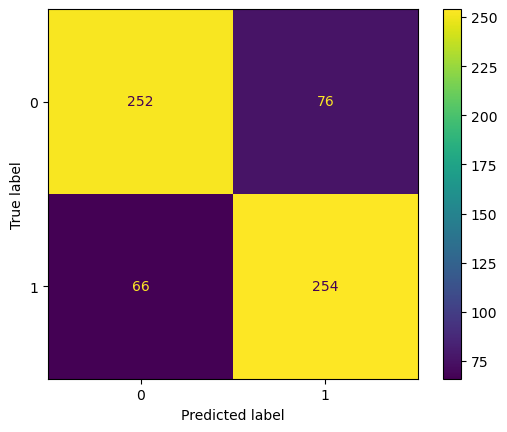

In [61]:
apply_model(lr,x_train,x_test,y_train,y_test)
predict_test(lr)

                    SVC

Train Score:   0.8132716049382716
Test Score:    0.816358024691358

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       328
         1.0       0.85      0.77      0.81       320

    accuracy                           0.82       648
   macro avg       0.82      0.82      0.82       648
weighted avg       0.82      0.82      0.82       648



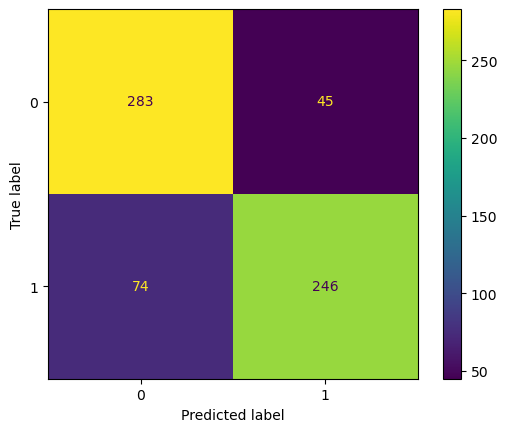

In [62]:
apply_model(svm,x_train,x_test,y_train,y_test)
predict_test(svm)

                    KNeighborsClassifier

Train Score:   0.8101851851851852
Test Score:    0.7916666666666666

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       328
         1.0       0.80      0.78      0.79       320

    accuracy                           0.79       648
   macro avg       0.79      0.79      0.79       648
weighted avg       0.79      0.79      0.79       648



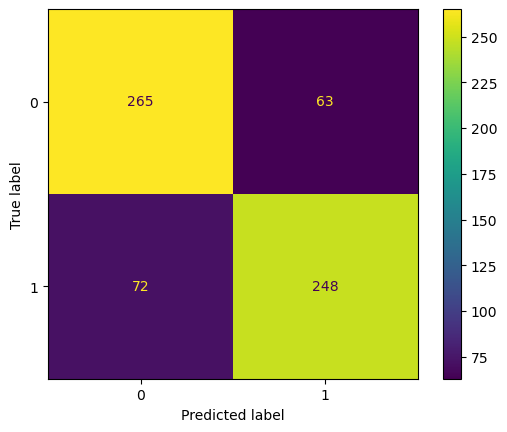

In [63]:
apply_model(knn,x_train,x_test,y_train,y_test)
predict_test(knn)

                    GaussianNB

Train Score:   0.7662037037037037
Test Score:    0.7592592592592593

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76       328
         1.0       0.75      0.78      0.76       320

    accuracy                           0.76       648
   macro avg       0.76      0.76      0.76       648
weighted avg       0.76      0.76      0.76       648



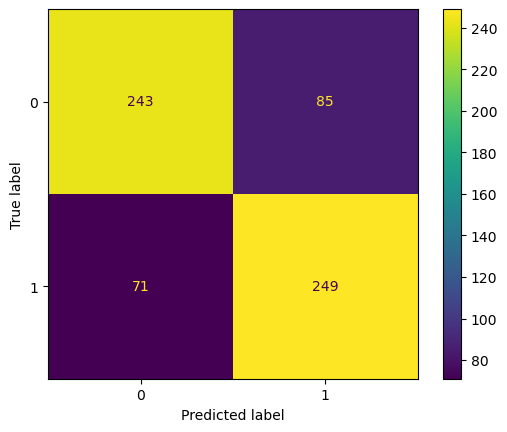

In [64]:
apply_model(gnb,x_train,x_test,y_train,y_test) 
predict_test(gnb)

                    XGBClassifier

Train Score:   0.9857253086419753
Test Score:    0.9737654320987654

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       328
         1.0       0.95      1.00      0.97       320

    accuracy                           0.97       648
   macro avg       0.97      0.97      0.97       648
weighted avg       0.98      0.97      0.97       648



c:\Users\sudhe\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


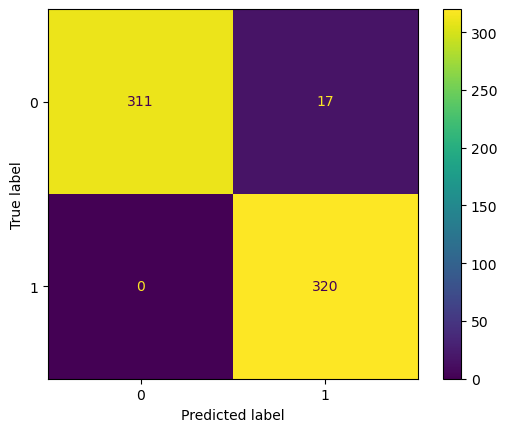

In [65]:
apply_model(xgb,x_train,x_test,y_train,y_test)
predict_test(xgb)

In [66]:
def kmeans_clus(df,not_x,not_y,k,cluster_label):
    df=df.copy()
    centroids,distortions=kmeans(df[[not_x,not_y]],k_or_guess=k)
    labels,_=vq(df[[not_x,not_y]],centroids)
    df[cluster_label]=labels
    sns.scatterplot(x=not_x,y=not_y,data=df,hue=cluster_label)
    for i in range(k):
        plt.scatter(x=centroids[i,0],y=centroids[i,1],s=500,cmap='Cyan')

C:\Users\sudhe\AppData\Local\Temp\ipykernel_28068\3062616711.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=centroids[i,0],y=centroids[i,1],s=500,cmap='Cyan')


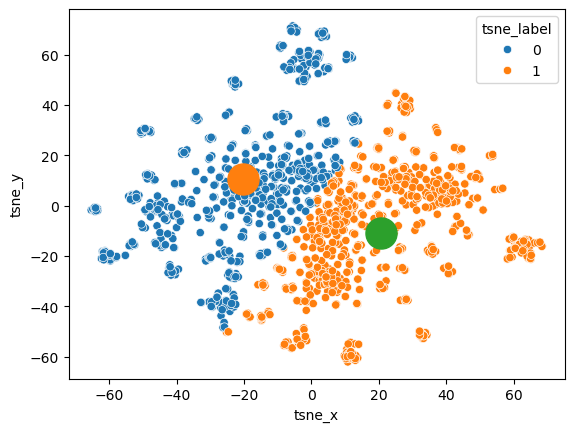

In [67]:
kmeans_clus(df,tsne_x,tsne_y,2,'tsne_label')

In [68]:
pca=PCA(random_state=44)
pc=pca.fit_transform(df_both.drop('Class',axis=1))
len(pc[0])
pc_x,pc_y='pc_x','pc_y'
df_both[pc_x]=pc[:,0]
df_both[pc_y]=pc[:,1]

In [69]:
df=df_both[:df.shape[0]]
df_test=df_both[df.shape[0]+1:].iloc[:,-2:].reset_index(drop=True)

In [70]:
x=df[[pc_x,pc_y]]
y=df[['Class']].values
x_train,x_test,y_train,y_test=over_sample_train_test(x,y)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_28068\3062616711.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=centroids[i,0],y=centroids[i,1],s=500,cmap='Cyan')


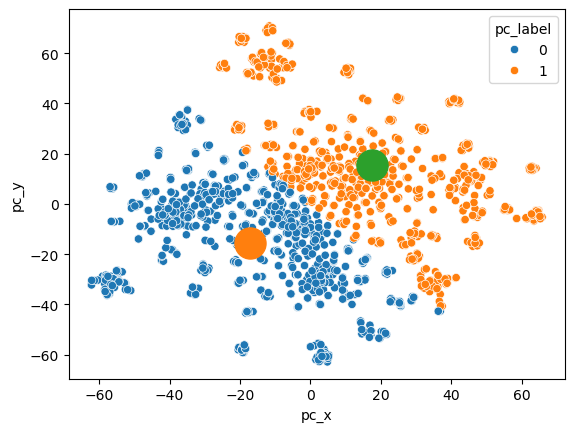

In [71]:
kmeans_clus(df,pc_x,pc_y,2,'pc_label')

                    LogisticRegression

Train Score:   0.7743055555555556
Test Score:    0.7808641975308642

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       328
         1.0       0.77      0.79      0.78       320

    accuracy                           0.78       648
   macro avg       0.78      0.78      0.78       648
weighted avg       0.78      0.78      0.78       648



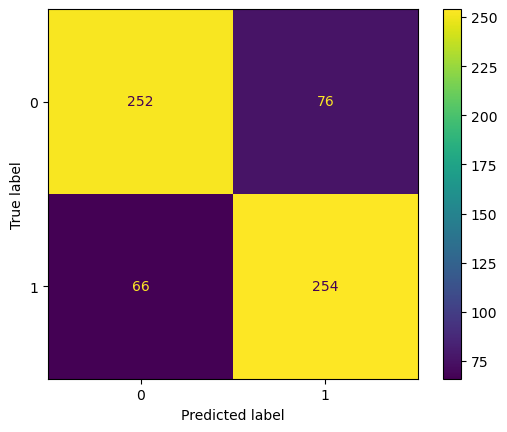

In [72]:
apply_model(lr,x_train,x_test,y_train,y_test)
predict_test(lr)

                    SVC

Train Score:   0.8101851851851852
Test Score:    0.8117283950617284

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       328
         1.0       0.84      0.76      0.80       320

    accuracy                           0.81       648
   macro avg       0.81      0.81      0.81       648
weighted avg       0.81      0.81      0.81       648



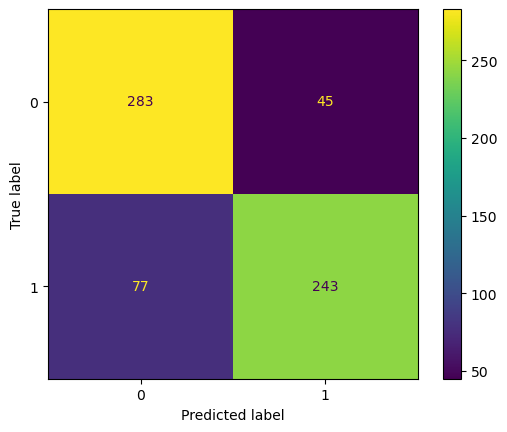

In [73]:
apply_model(svm,x_train,x_test,y_train,y_test)
predict_test(svm)

                    KNeighborsClassifier

Train Score:   0.8097993827160493
Test Score:    0.7916666666666666

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       328
         1.0       0.80      0.78      0.79       320

    accuracy                           0.79       648
   macro avg       0.79      0.79      0.79       648
weighted avg       0.79      0.79      0.79       648



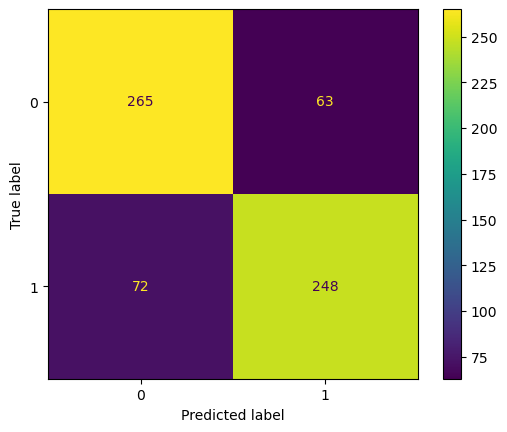

In [74]:
apply_model(knn,x_train,x_test,y_train,y_test)
predict_test(knn)

                    GaussianNB

Train Score:   0.7631172839506173
Test Score:    0.7623456790123457

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       328
         1.0       0.75      0.78      0.76       320

    accuracy                           0.76       648
   macro avg       0.76      0.76      0.76       648
weighted avg       0.76      0.76      0.76       648



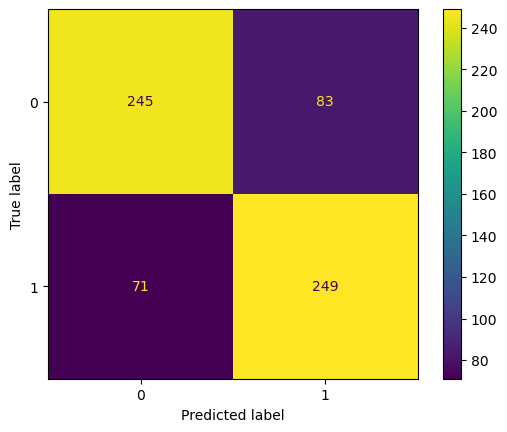

In [75]:
apply_model(gnb,x_train,x_test,y_train,y_test) 
predict_test(gnb)

                    XGBClassifier

Train Score:   0.9868827160493827
Test Score:    0.9645061728395061

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       328
         1.0       0.93      1.00      0.97       320

    accuracy                           0.96       648
   macro avg       0.97      0.96      0.96       648
weighted avg       0.97      0.96      0.96       648



c:\Users\sudhe\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:58:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


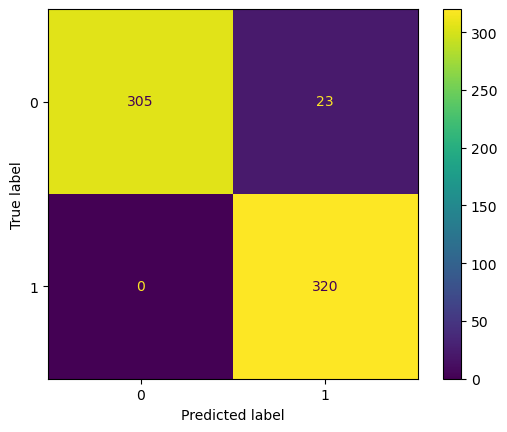

In [76]:
apply_model(xgb,x_train,x_test,y_train,y_test)
predict_test(xgb)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_28068\3062616711.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=centroids[i,0],y=centroids[i,1],s=500,cmap='Cyan')


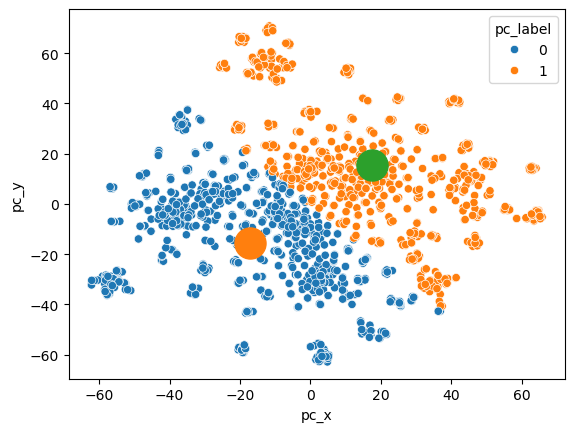

In [77]:
kmeans_clus(df,pc_x,pc_y,2,'pc_label')

In [78]:
df_pred

,LogisticRegression1,SVC1,KNeighborsClassifier1,GaussianNB1,DecisionTreeClassifier1,RandomForestClassifier1,XGBClassifier1,LogisticRegression2,SVC2,KNeighborsClassifier2,GaussianNB2,XGBClassifier2,LogisticRegression3,SVC3,KNeighborsClassifier3,GaussianNB3,XGBClassifier3
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1
2,1.0,1.0,1.0,0.0,0.0,1.0,1,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
751,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
752,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
753,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [79]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class,tsne_x,tsne_y,pc_x,pc_y
0,1.073694,0.419477,-0.622123,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,-5.860279,-32.152977,13.724445,-29.766852
1,-0.656580,-0.326405,0.388123,1.0,0,0,0,0,0,1,...,0,1,0,0,0,0.0,42.034981,-9.799229,-38.156112,-19.587142
2,1.052066,0.322609,-0.655758,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,13.575651,-39.036938,-3.459829,-41.131112
3,-0.224012,-0.742936,-0.859827,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.499151,6.837211,-2.813914,6.314632
4,-0.829608,1.136298,2.078441,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,28.431225,8.527042,-29.440775,1.473029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-1.067521,-1.120720,-0.463653,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,-6.599848,23.738400,0.950741,24.694198
1759,-0.224012,0.806948,0.724871,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,26.991402,-24.665615,-19.985964,-30.393918
1760,0.987180,0.981310,-0.356369,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,8.859206,-20.260595,-3.444269,-21.789448
1761,-0.743094,-0.345778,0.749632,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0.0,12.610397,34.332550,-20.282797,30.323358
